In [ ]:
# !pip install h5py pyyaml 

In [ ]:
from __future__ import absolute_import, division, print_function 
import os 
import tensorflow as tf 
from tensorflow import keras 

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
# loading the mnist dataset 
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# taking the first 1000 images 
train_labels = train_labels[:1000] 
test_labels = test_labels[:1000] 

# reshaping the images 
train_images = train_images[:1000].reshape(-1, 28*28) / 255.0 
test_images = test_images[:1000].reshape(-1, 28*28) / 255.0 

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io , img_as_float

In [ ]:
# plt.imshow(train_images[2], aspect = 'equal', cmap  = 'Blues')
# plt.grid(False)
# _ = plt.show()

In [ ]:
# defining the model 

def create_model():
    model = tf.keras.models.Sequential([
        # input layer 
        keras.layers.Dense(
            units = 163, 
            activation = tf.nn.relu,
            input_shape = (784, )),
        # adding the drop out 
        keras.layers.Dropout(0.2), 
        # adding the output dense layer 
        keras.layers.Dense(units = 10 , activation = tf.nn.softmax) 
    ]) 

    # compiling the model 
    model.compile(
        optimizer = tf.keras.optimizers.Adam(), 
        loss = tf.keras.losses.sparse_categorical_crossentropy, 
        metrics = ['accuracy'] 
    )

    return model 

In [ ]:
# create the basic model instance 
model = create_model() 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 163)               127955    
_________________________________________________________________
dropout (Dropout)            (None, 163)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1640      
Total params: 129,595
Trainable params: 129,595
Non-trainable params: 0
_________________________________________________________________


#### Now tf.keras.callbacks.ModelCheckpoint is a callback that performs saving the checkpoints during and at the end of training. The callback takes a couple of arguments to configure checkpointing.

In [ ]:
checkpoint_path = 'training_1/cp.ckpt' 
checkpoint_dir = os.path.dirname(checkpoint_path) 

# create checkpoint callback 
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, 
    save_weights_only = True, 
    verbose = 1 
)

model =  create_model() 
model.fit(
    train_images, 
    train_labels, 
    epochs = 10, 
    validation_data = (test_images, test_labels), 
    callbacks = [cp_callback] # passing callbacks to training 
)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 1.4512 - accuracy: 0.5770 - val_loss: 0.9631 - val_accuracy: 0.7560

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.8290 - val_loss: 0.6613 - val_accuracy: 0.8070

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4251 - accuracy: 0.8810 - val_loss: 0.5804 - val_accuracy: 0.8250

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.9120 - val_loss: 0.5213 - val_accuracy: 0.8380

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2650 - accuracy: 0.9330 - val_loss: 0.4913 - val_accuracy: 0.8420

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
32/32 [==============================] - 0s 

In [ ]:
!ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [ ]:
model = create_model() 
loss, acc = model.evaluate(test_images, test_labels) 
print('Untrained model, accuracy : {:5.2f}%'.format(100*acc)) 

32/32 [==============================] - 0s 1ms/step - loss: 2.3553 - accuracy: 0.0970
Untrained model, accuracy :  9.70%


In [ ]:
# load the weights from the checkpoint and re-evaluate 
model.load_weights(checkpoint_path) 
loss, acc = model.evaluate(test_images, test_labels) 
print('Restored model, accuracy : {:5.2f}%'.format(100*acc)) 

32/32 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8550
Restored model, accuracy : 85.50%


In [ ]:
# adjusting the checkpoint frequency by training new model 
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt" 
checkpoint_dir = os.path.dirname(checkpoint_path) 

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose = 1, save_weights_only = True, 

    # save werights by every 5 epoch 
    period = 5
) 

model = create_model() 
model.fit(train_images, train_labels, 
          epochs = 50 , 
          callbacks = [cp_callback], 
          validation_data = (test_images, test_labels), 
          verbose = 0) 


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [ ]:
!ls {checkpoint_dir}

checkpoint			  cp-0030.ckpt.data-00000-of-00001
cp-0005.ckpt.data-00000-of-00001  cp-0030.ckpt.index
cp-0005.ckpt.index		  cp-0035.ckpt.data-00000-of-00001
cp-0010.ckpt.data-00000-of-00001  cp-0035.ckpt.index
cp-0010.ckpt.index		  cp-0040.ckpt.data-00000-of-00001
cp-0015.ckpt.data-00000-of-00001  cp-0040.ckpt.index
cp-0015.ckpt.index		  cp-0045.ckpt.data-00000-of-00001
cp-0020.ckpt.data-00000-of-00001  cp-0045.ckpt.index
cp-0020.ckpt.index		  cp-0050.ckpt.data-00000-of-00001
cp-0025.ckpt.data-00000-of-00001  cp-0050.ckpt.index
cp-0025.ckpt.index


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir) 
latest

'training_2/cp-0050.ckpt'

##### Note : The default tensorflow format only saves 5 most recent checkpoints 

In [ ]:
# testing the latest chekpoint 
model = create_model() 
model.load_weights(latest) 
loss, acc = model.evaluate(test_images, test_labels) 
print('Restored model, accuracy : {:5.2f}%'.format(100*acc))

32/32 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8670
Restored model, accuracy : 86.70%


#### Notes : The checkpoint files contain only the trained weihgts in a binary format 

In [ ]:
# another way of saving model 

# saving the weights 
model.save_weights('./checkpoints/my_checkpoint') 

# restore the weights 
model = create_model() 
model.load_weights('./checkpoints/my_checkpoint') 

loss, acc = model.evaluate(test_images, test_labels) 
print('Restored model, accuracy : {:5.2f}%'.format(100*acc)) 


32/32 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8670
Restored model, accuracy : 86.70%


# Save the entire model 
The entire model can be saved to a file that contains the weight values, the model's configuration, and even the optimizer's configuraton. This allows you to checkpoint a model and resume the training later- from the exact same state- without access to the original code.  

In [ ]:
model =  create_model() 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 163)               127955    
_________________________________________________________________
dropout_8 (Dropout)          (None, 163)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1640      
Total params: 129,595
Trainable params: 129,595
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs = 5) 

# saving the model to hdf5 file 
model.save('my_model.h5') 


Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 1.5180 - accuracy: 0.5710
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.8190
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8880
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.9090
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.9300


In [ ]:
# recreate the exactt same model, including the weights and optimizer. 
new_model = keras.models.load_model('my_model.h5') 
new_model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 163)               127955    
_________________________________________________________________
dropout_8 (Dropout)          (None, 163)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1640      
Total params: 129,595
Trainable params: 129,595
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# now we can check its accuracy 
loss, acc = new_model.evaluate(test_images, test_labels) 
print('restored_model, accuracy : {:5.2f}%'.format(100*acc)) 

32/32 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.8410
restored_model, accuracy : 84.10%


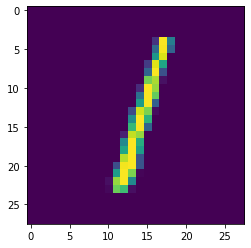

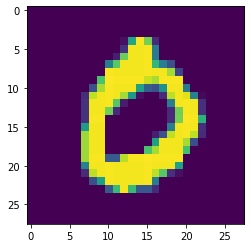

In [ ]:
# A few random samples
use_samples = [2,3]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = test_images[sample].reshape((28, 28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(test_images[sample])

In [ ]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
samples_to_predict.shape

(2, 784)

In [ ]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

[[1.3772099e-03 8.6017650e-01 5.7426013e-02 1.0724638e-02 1.9364188e-03
  2.2135994e-03 1.0277317e-02 2.9684622e-02 1.9005593e-02 7.1781212e-03]
 [9.7498953e-01 3.3111451e-06 2.9906649e-03 3.5176676e-04 2.3513845e-04
  2.3575819e-03 1.4243071e-02 4.3246350e-03 1.0586347e-04 3.9861479e-04]]


In [ ]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[1 0]
